In [1]:
%matplotlib inline
import pandas as pd
#import pandas.util.testing as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from os import walk
from tqdm import tqdm

In [2]:
import pysam

In [3]:
breakpointDF = pd.read_csv('/home/mark/Desktop/chromosome_y/breakpoints/Yq12_Inversion_Breakpoints.csv').set_index("Sample_Name")

In [4]:
breakpointDF

,Assembly,Proximal_Contig_Name,Proximal_1st_Breakpoint,Proximal_2nd_Breakpoint,Distal_Contig_Name,Distal_1st_Breakpoint,Distal_2nd_Breakpoint
Sample_Name,,,,,,,
HG002,Complete,chrY,28673535.0,29238493.0,chrY,61145507,61404974
HG02666,Complete,chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749....,30372859.0,30955148.0,chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749....,52803703,53445091
HG02011,Complete,chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0...,18167324.0,18945823.0,chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0...,39033959,39536354
HG01890,Complete,chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890,29844211.0,29857045.0,chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890,44446944,45041243
HG01952,Complete,chrY.21-24.01.AMPL7-PAR2.FW.utig4-9605.HG01952,1899453.0,2577931.0,chrY.21-24.01.AMPL7-PAR2.FW.utig4-9605.HG01952,22309789,22681591
HG00358,Complete,chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358,27665566.0,28193943.0,chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358,57313376,57922190
HG01106,Complete,NaN,NaN,NaN,chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976...,36797732,37147912
NA19347,Fragmented,chrY.09-23.01.HET1_centro-HET3_Yq.RV.unassigne...,18120241.0,18940332.0,chrY.23-24.01.HET3_Yq-PAR2.FW.unassigned-00008...,2932598,3403056
NA19317,Fragmented,chrY.01-23.01.PAR1-HET3_Yq.RV.unassigned-00009...,29160467.0,29980560.0,chrY.23-24.01.HET3_Yq-PAR2.RV.unassigned-00004...,2868656,3339114


In [3]:
GenomeDict = {'HG002':'/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/T2T.chrY.fasta', 
             'HG02666':'/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HC02666.HIFIRW.ONTUL.na.chrY.fasta', 
             'HG02011':'/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG02011.HIFIRW.ONTUL.na.chrY.fasta', 
             'HG01890':'/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG01890.chrY.fasta', 
             'HG01952':'/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG01952.chrY.fasta', 
             'HG00358':'/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG00358.chrY.fasta', 
             'HG01106':'/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01106.HIFIRW.ONTUL.na.chrY.fasta', 
             'NA19347':'/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/NA19347.HIFIRW.ONTUL.na.chrY.fasta', 
             'NA19317':'/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/NA19317.HIFIRW.ONTUL.na.chrY.fasta', 
             'NA19705':'/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/NA19705.HIFIRW.ONTUL.na.chrY.fasta', 
             'HG01928':'/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01928.HIFIRW.ONTUL.na.chrY.fasta'
}

In [32]:
HC02666_df = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HC02666/HC02666_rbDF2_Kmode.csv").set_index("Alu")#.drop(columns=['Unnamed: 0'])
HG01890_df = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01890/HG01890_rbDF2_Kmode.csv").set_index("Alu")#.drop(columns=['Unnamed: 0'])
HG00358_df = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG00358/HG00358_rbDF2_Kmode.csv").set_index("Alu")#.drop(columns=['Unnamed: 0'])
HG02011_df = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG02011/HG02011_rbDF2_Kmode.csv").set_index("Alu")#.drop(columns=['Unnamed: 0'])
HG01106_df = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01106/HG01106_rbDF2_Kmode.csv").set_index("Alu")#.drop(columns=['Unnamed: 0'])
T2T_df = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/T2T/T2T_rbDF2_Kmode.csv").set_index("Alu")#.drop(columns=['Unnamed: 0'])
HG01952_df = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01952/HG01952_rbDF2_Kmode.csv").set_index("Alu")#.drop(columns=['Unnamed: 0'])

In [34]:
import ast

def pullSequences(genome, df):
    df2 = df[df['KMode_cluster']!='GraveYard'].copy()
    
    for unit in df2.index:
        if 'C_' in str(unit):
            coordinate = ast.literal_eval(df.at[unit,'Group'])[-1]
            int(coordinate.split(" ")[7])
            
            with open("/home/mark/Desktop/DYZ2_Ends.fasta", 'a+') as file:
                file.write(pysam.faidx(GenomeDict[genome], str(breakpointDF.at[genome,'Distal_Contig_Name'])+":"+str(int(coordinate.split(" ")[7]))+"-"+str(int(coordinate.split(" ")[7])+30)))
            file.close()
            
        else:
            continue
        


In [35]:
import ast

def pullSequences_T2T(genome, df):
    df2 = df[df['KMode_cluster']!='GraveYard'].copy()
    
    for unit in df2.index:
        if 'C_' in str(unit):
            coordinate = ast.literal_eval(df.at[unit,'Group'])[-1]
            int(coordinate.split(" ")[6])
            
            with open("/home/mark/Desktop/DYZ2_Ends.fasta", 'a+') as file:
                file.write(pysam.faidx(GenomeDict[genome], str(breakpointDF.at[genome,'Distal_Contig_Name'])+":"+str(int(coordinate.split(" ")[6]))+"-"+str(int(coordinate.split(" ")[6])+30)))
            file.close()
            
        else:
            continue
        


In [36]:
pullSequences('HG02666', HC02666_df)

NameError: name 'pysam' is not defined

In [ ]:
pullSequences('HG01890', HG01890_df)

In [37]:
pullSequences('HG00358', HG00358_df)

NameError: name 'pysam' is not defined

In [47]:
pullSequences('HG02011', HG02011_df)

In [10]:
HG01106_df.loc['C_AluY_2855516-2855807']['Group']

"['50689 196 23.5 4.1 4.0 chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106 2854767 2855515 35344130 False (ATATATA)n Simple_repeat 1 750 0 20913 False', '50690 1375 19.9 0.0 5.4 chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106 2855516 2855807 35343838 True AluY SINE/Alu 12 289 13 20914 True', '50691 3922 10.2 0.0 0.0 chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106 2855807 2856374 35343271 True HSATI Satellite 0 568 1 20915 False']"

In [48]:
pullSequences('HG01106', HG01106_df)

In [49]:
pullSequences('HG01952', HG01952_df)

In [50]:
pullSequences_T2T('HG002',T2T_df)

## Pull DYZ2 Blocks

In [3]:
breakpointDF = pd.read_csv('/home/mark/Desktop/chromosome_y/breakpoints/Yq12_Inversion_Breakpoints.csv').set_index("Sample_Name")

In [40]:
HG00358 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG00358/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HC02666 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HC02666/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HG01890 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01890/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HG01952 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01952/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HG01106 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01106/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HG02011 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG02011/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
T2T = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/T2T/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])

In [5]:
import pysam

In [6]:
GenomeDict = {'HG002':'/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/T2T.chrY.fasta', 
             'HG02666':'/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HC02666.HIFIRW.ONTUL.na.chrY.fasta', 
             'HG02011':'/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG02011.HIFIRW.ONTUL.na.chrY.fasta', 
             'HG01890':'/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG01890.chrY.fasta', 
             'HG01952':'/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG01952.chrY.fasta', 
             'HG00358':'/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG00358.chrY.fasta', 
             'HG01106':'/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01106.HIFIRW.ONTUL.na.chrY.fasta', 
             'NA19347':'/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/NA19347.HIFIRW.ONTUL.na.chrY.fasta', 
             'NA19317':'/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/NA19317.HIFIRW.ONTUL.na.chrY.fasta', 
             'NA19705':'/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/NA19705.HIFIRW.ONTUL.na.chrY.fasta', 
             'HG01928':'/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01928.HIFIRW.ONTUL.na.chrY.fasta'
}

In [11]:
def pullBlocks(df, genome):
    df2 = df[df['Block_Type']=='Repeat Block'].copy()
    
    for block in df2.index:
        with open("/home/mark/Desktop/chromosome_y/DYZ2_Blocks/"+str(genome)+"/"+str(genome)+"_blocks.fasta", 'a+') as file:
            file.write(pysam.faidx(GenomeDict[genome], str(breakpointDF.at[genome,'Distal_Contig_Name'])+":"+str(df2.at[block,'Start']-5000)+"-"+str(df2.at[block,'End']+5000)))
        file.close()
        
    with open("/home/mark/Desktop/chromosome_y/DYZ2_Blocks/"+str(genome)+"/"+str(genome)+"_blocks.fasta", 'r') as filein:
        Lines = filein.readlines()
        with open("/home/mark/Desktop/chromosome_y/DYZ2_Blocks/"+str(genome)+"_CleanBlocks.fasta", 'a+') as file2:
            for line in Lines:
                if ">" in line:
                    file2.write(">"+str(genome)+":"+str(line.split(":")[1]))
                else:
                    file2.write(line)
        file2.close()
    filein.close()

In [19]:
pullBlocks(HG00358, 'HG00358')

In [20]:
pullBlocks(HC02666, 'HG02666')
pullBlocks(HG02011, 'HG02011')
pullBlocks(HG01106, 'HG01106')
pullBlocks(HG01952, 'HG01952')
pullBlocks(HG01890, 'HG01890')
pullBlocks(T2T, 'HG002')

## Check HMMER calls on new DYZ2

In [42]:
HG00358 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG00358/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HC02666 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HC02666/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HG01890 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01890/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HG01952 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01952/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HG01106 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01106/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HG02011 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG02011/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
T2T = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/T2T/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])

In [43]:
def pullCoords(df, genome):
    df2 = df[df['Block_Type']=='Repeat Block'].copy()
    coordList = {}
    i =0
    for row in df2.index:
        coordList[str(genome)+":"+str(int(df2.at[row,'Start'])-5000)+"-"+str(int(df2.at[row,'End'])+5000)] = i
        i+=1
    return(coordList)

In [44]:
HG00358_cords = pullCoords(HG00358, 'HG00358')
HG002_cords = pullCoords(T2T, 'HG002')
HG02011_cords = pullCoords(HG02011, 'HG02011')
HG01106_cords = pullCoords(HG01106, 'HG01106')
HG01952_cords = pullCoords(HG01952, 'HG01952')
HG01890_cords = pullCoords(HG01890, 'HG01890')
HG02666_cords = pullCoords(HC02666, 'HG02666')

In [45]:
def cleanHMMER(genome, coordinateDict):
    with open("/home/mark/Desktop/chromosome_y/DYZ2_Blocks/"+str(genome)+"_hmmer.tbl", 'r') as file:
        Lines = file.readlines()
        
        goodDYZ2 = []
        for line in Lines:
            if genome in line:
                try:
                    tempList = line.split()
                    block = tempList[0]
                    length =  int(tempList[5]) - int(tempList[4])+1
                    orientation = tempList[11]
                    if orientation == '-':
                        start = tempList[7]
                        end = tempList[6]
                    else:
                        start = tempList[6]
                        end = tempList[7]

                    score = tempList[12]
                    
                    coordinatePull = str(int(tempList[0].split(":")[1].split("-")[0])+int(start))+"-"+str(int(tempList[0].split(":")[1].split("-")[0])+int(end))
                    
                    if score == '0':
                        goodDYZ2.append([int(coordinateDict[block]), int(length), orientation, int(start), int(end), int(score), coordinatePull, block])
                        #goodDYZ2.append([int(coordinateDict[block]), int(length), orientation, int(start), int(end), int(score)])

                    else:
                        continue
                except:
                    continue
                
            else:
                continue
                
    file.close()
    
    tempDF = pd.DataFrame(data=goodDYZ2, columns=['Block', 'Length', 'Orientation', 'Start', 'End', 'Score', 'Coordinates', 'Original_Block'])
    #tempDF = pd.DataFrame(data=goodDYZ2, columns=['Block', 'Length', 'Orientation', 'Start', 'End', 'Score'])

    return(tempDF.sort_values(by=['Block','Start']))

In [46]:
HG00358_CH = cleanHMMER('HG00358',HG00358_cords)
HG002_CH = cleanHMMER('HG002',HG002_cords)
HG02011_CH = cleanHMMER('HG02011',HG02011_cords)
HG01106_CH = cleanHMMER('HG01106',HG01106_cords)
HG01952_CH = cleanHMMER('HG01952',HG01952_cords)
HG01890_CH = cleanHMMER('HG01890',HG01890_cords)
HG02666_CH = cleanHMMER('HG02666',HG02666_cords)

In [71]:
HG00358_df.loc['C_AluY_27648628-27648919']['Group']

"['42438 373 24.1 3.6 3.7 chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358 27647271 27648627 31254814 False (ATATAAT)n Simple_repeat 7 1363 0 34179 False', '42439 1378 19.9 0.0 5.4 chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358 27648628 27648919 31254522 True AluY SINE/Alu 12 289 13 34180 True', '42440 3991 9.5 0.0 0.2 chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358 27648919 27649487 31253954 True HSATI Satellite 0 568 1 34181 False']"

In [48]:
import ast
def compareBoth(df, dfCH):
    tempList = []
    i = 0
    for block in set(dfCH['Block']):
        totalGood = 0
        
        for row in df[df['RepeatBlock']==block].index:
            Sat = 0
            SR = 0
            Alu = 0
            for repeat in ast.literal_eval(df.at[row,'Group']):
                if 'Satellite' in str(repeat):
                    Sat+=1
                elif 'Simple_repeat' in str(repeat):
                    SR+=1
                elif 'SINE/Alu' in str(repeat):
                    Alu+=1
                else:
                    continue
            if Sat>0 and SR >0 and Alu >0:
                totalGood+=1
            else:
                continue
                    
        
        tempList.append([len(df[df['RepeatBlock']==block]), len(dfCH[dfCH['Block']==block]), int(totalGood)])
    
    tempDF = pd.DataFrame(data=tempList, columns=['Original', 'New', 'Total_Good'])
    return(tempDF)
        

<AxesSubplot:xlabel='Total_Good', ylabel='New'>

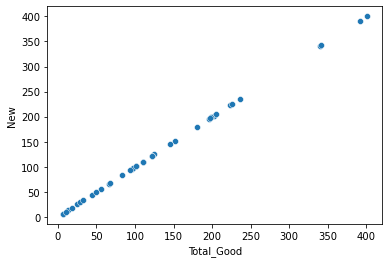

In [49]:
sns.scatterplot(data=compareBoth(HG00358_df, HG00358_CH), x='Total_Good', y='New')

<AxesSubplot:xlabel='Total_Good', ylabel='New'>

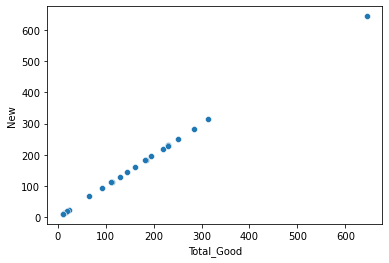

In [74]:
sns.scatterplot(data=compareBoth(HC02666_df, HG02666_CH), x='Total_Good', y='New')

<AxesSubplot:xlabel='Total_Good', ylabel='New'>

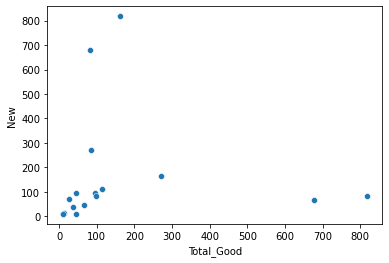

In [75]:
sns.scatterplot(data=compareBoth(HG01890_df, HG01890_CH), x='Total_Good', y='New')

<AxesSubplot:xlabel='Total_Good', ylabel='New'>

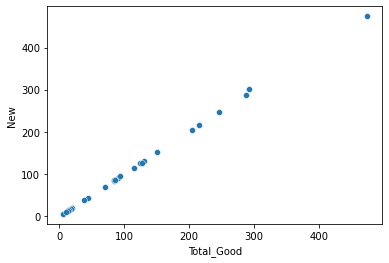

In [123]:
sns.scatterplot(data=compareBoth(HG02011_df, HG02011_CH), x='Total_Good', y='New')

<AxesSubplot:xlabel='Total_Good', ylabel='New'>

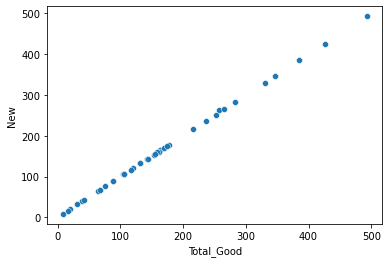

In [124]:
sns.scatterplot(data=compareBoth(HG01106_df, HG01106_CH), x='Total_Good', y='New')

<AxesSubplot:xlabel='Total_Good', ylabel='New'>

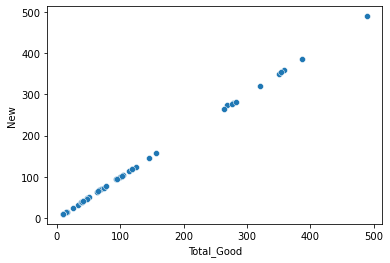

In [125]:
sns.scatterplot(data=compareBoth(T2T_df, HG002_CH), x='Total_Good', y='New')

<AxesSubplot:xlabel='Total_Good', ylabel='New'>

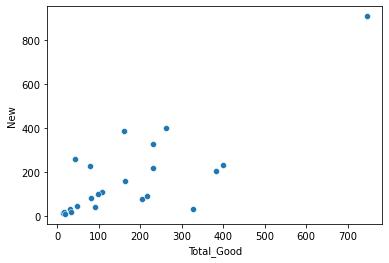

In [126]:
sns.scatterplot(data=compareBoth(HG01952_df, HG01952_CH), x='Total_Good', y='New')

# Pull Sequences for Repeatmasking

In [50]:
GenomeDict = {'HG002':'/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/T2T.chrY.fasta', 
             'HG02666':'/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HC02666.HIFIRW.ONTUL.na.chrY.fasta', 
             'HG02011':'/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG02011.HIFIRW.ONTUL.na.chrY.fasta', 
             'HG01890':'/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG01890.chrY.fasta', 
             'HG01952':'/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG01952.chrY.fasta', 
             'HG00358':'/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG00358.chrY.fasta', 
             'HG01106':'/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01106.HIFIRW.ONTUL.na.chrY.fasta', 
             'NA19347':'/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/NA19347.HIFIRW.ONTUL.na.chrY.fasta', 
             'NA19317':'/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/NA19317.HIFIRW.ONTUL.na.chrY.fasta', 
             'NA19705':'/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/NA19705.HIFIRW.ONTUL.na.chrY.fasta', 
             'HG01928':'/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01928.HIFIRW.ONTUL.na.chrY.fasta'
}

In [57]:
def pullHMMSeqs(df, genome):
    df2 = df.copy()
    
    for block in df2.index:
        with open("/home/mark/Desktop/chromosome_y/DYZ2_End_Refinement/DYZ2_HMMER_Sequences/"+str(genome)+"_HMMseqs.fasta", 'a+') as file:
            file.write(pysam.faidx(GenomeDict[genome], str(breakpointDF.at[genome,'Distal_Contig_Name'])+":"+str(df2.at[block,'Coordinates'])))
        file.close()
        
    with open("/home/mark/Desktop/chromosome_y/DYZ2_End_Refinement/DYZ2_HMMER_Sequences/"+str(genome)+"_HMMseqs.fasta", 'r') as filein:
        Lines = filein.readlines()
        with open("/home/mark/Desktop/chromosome_y/DYZ2_End_Refinement/DYZ2_HMMER_Sequences/"+str(genome)+"_CleanHMM.fasta", 'a+') as file2:
            for line in Lines:
                if ">" in line:
                    file2.write(">"+str(genome)+":"+str(line.split(":")[1]))
                else:
                    file2.write(line)
        file2.close()
    filein.close()

In [22]:
#HG00358_CH = cleanHMMER('HG00358',HG00358_cords)
#HG002_CH = cleanHMMER('HG002',HG002_cords)
#HG02011_CH = cleanHMMER('HG02011',HG02011_cords)
#HG01106_CH = cleanHMMER('HG01106',HG01106_cords)
#HG01952_CH = cleanHMMER('HG01952',HG01952_cords)
#HG01890_CH = cleanHMMER('HG01890',HG01890_cords)
#HG02666_CH = cleanHMMER('HG02666',HG02666_cords)

In [60]:
pullHMMSeqs(HG02666_CH,'HG02666')
pullHMMSeqs(HG00358_CH,'HG00358')
pullHMMSeqs(HG002_CH,'HG002')
pullHMMSeqs(HG02011_CH,'HG02011')
pullHMMSeqs(HG01106_CH,'HG01106')
pullHMMSeqs(HG01952_CH,'HG01952')
pullHMMSeqs(HG01890_CH,'HG01890')

## Import RepeatMasker info

In [51]:
def incorporateRepeatMaskerInfo(df, genome):
    genDict = {str(genome)+':'+str(x):{'Simple_repeat':0, 'SINE/Alu':0, 'Satellite':0} for x in set(df['Coordinates'])}
    with open("/home/mark/Desktop/chromosome_y/DYZ2_End_Refinement/DYZ2_HMMER_Sequences/RepeatMasked/"+str(genome)+"_CleanHMM.fasta.out", 'r') as file:
        Lines = file.readlines()
        for line in Lines:
            if str(genome) in line:
                goodLine = ' '.join(line.split())
                try:
                    genDict[goodLine.split(" ")[4]][goodLine.split(" ")[10]]+=1
                except:
                    continue
            
    file.close()
    
    df2 = df.set_index("Coordinates")
    df2['Classification']='NOT_TRIPARTITE'
    df2['Missing_Piece']='None'

    for insert in df2.index:
        if (genDict[str(genome)+":"+str(insert)]['Simple_repeat']>0) and (genDict[str(genome)+":"+str(insert)]['SINE/Alu']>0) and (genDict[str(genome)+":"+str(insert)]['Satellite']>0):
            df2.at[insert,'Classification']='GOOD_DYZ2'
        elif (genDict[str(genome)+":"+str(insert)]['Simple_repeat']>0) and (genDict[str(genome)+":"+str(insert)]['SINE/Alu']>0) and (genDict[str(genome)+":"+str(insert)]['Satellite']==0):
            df2.at[insert,'Missing_Piece'] ='Satellite'
        elif (genDict[str(genome)+":"+str(insert)]['Simple_repeat']>0) and (genDict[str(genome)+":"+str(insert)]['SINE/Alu']==0) and (genDict[str(genome)+":"+str(insert)]['Satellite']>0):
            df2.at[insert,'Missing_Piece'] = 'Alu'
        elif (genDict[str(genome)+":"+str(insert)]['Simple_repeat']==0) and (genDict[str(genome)+":"+str(insert)]['SINE/Alu']>0) and (genDict[str(genome)+":"+str(insert)]['Satellite']>0):
            df2.at[insert,'Missing_Piece'] = 'Simple_repeat'
        else:
            continue
            
            
    #Add 1 to correct for actual length of repeat
    df2['Length']+=1
    df2['End']+=1
    return(df2)

In [55]:
HG00358_FILTDF = incorporateRepeatMaskerInfo(HG00358_CH, 'HG00358')
HG01106_FILTDF = incorporateRepeatMaskerInfo(HG01106_CH, 'HG01106')
HG02011_FILTDF = incorporateRepeatMaskerInfo(HG02011_CH, 'HG02011')
HG02666_FILTDF = incorporateRepeatMaskerInfo(HG02666_CH, 'HG02666')
HG01890_FILTDF = incorporateRepeatMaskerInfo(HG01890_CH, 'HG01890')
HG01952_FILTDF = incorporateRepeatMaskerInfo(HG01952_CH, 'HG01952')
HG002_FILTDF = incorporateRepeatMaskerInfo(HG002_CH, 'HG002')

In [53]:
def pullLengthInfo(ndf, odf):
    df = ndf.copy()
    df['SpaceBefore'] = 0
    df['SpaceAfter'] = 0

    flag= 0
    lastRow = 'temp'
    i=0
    for row in df.index:
        if flag == 0:
            flag+=1
            lastRow=row
            df.at[row,'SpaceAfter'] = int(df.iloc[i+1]['Start']) - int(df.iloc[i]['End'])
            i+=1
            continue
        else:
            df.at[row,'SpaceBefore'] = int(row.split("-")[0]) - int(lastRow.split("-")[1])
            try:
                df.at[row,'SpaceAfter'] = int(df.iloc[i+1]['Start']) - int(df.iloc[i]['End'])
            except:
                df.at[row,'SpaceAfter'] = 0
            lastRow = row
            i+=1


    df['Original_Length'] = 0

    for block in set(df['Block']):
        tempDF = df[df['Block']==block].copy()
        tempDF2 = odf[odf['RepeatBlock']==block].copy()
        for row in tempDF.index:
            for alu in tempDF2.index:
                if int(alu.split("_")[2].split("-")[0]) > int(row.split("-")[0]) and int(alu.split("_")[2].split("-")[1]) < int(row.split("-")[1]):
                    df.at[row,'Original_Length'] =  odf.at[alu,'Lengths']
                else:
                    continue
                    
    return(df)
        

In [56]:
HG00358_Final = pullLengthInfo(HG00358_FILTDF, HG00358_df)
HG02011_Final = pullLengthInfo(HG02011_FILTDF, HG02011_df)
HG01106_Final = pullLengthInfo(HG01106_FILTDF, HG01106_df)
HG002_Final = pullLengthInfo(HG002_FILTDF, T2T_df)
HG01890_Final = pullLengthInfo(HG01890_FILTDF, HG01890_df)
HG01952_Final = pullLengthInfo(HG01952_FILTDF, HG01952_df)
HG02666_Final = pullLengthInfo(HG02666_FILTDF, HC02666_df)

In [57]:
HG002_Final

,Block,Length,Orientation,Start,End,Score,Original_Block,Classification,Missing_Piece,SpaceBefore,SpaceAfter,Original_Length
Coordinates,,,,,,,,,,,,
28660069-28662297,0,2230,-,4996,7225,0,HG002:28655073-28691560,GOOD_DYZ2,None,0,1,2217
28662299-28664715,0,2420,-,7226,9643,0,HG002:28655073-28691560,GOOD_DYZ2,None,2,1,2411
28664717-28667133,0,2420,-,9644,12061,0,HG002:28655073-28691560,GOOD_DYZ2,None,2,1,2411
28667135-28669541,0,2419,-,12062,14469,0,HG002:28655073-28691560,GOOD_DYZ2,None,2,2,2402
28669544-28671952,0,2420,-,14471,16880,0,HG002:28655073-28691560,GOOD_DYZ2,None,3,1,2403
...,...,...,...,...,...,...,...,...,...,...,...,...
62013271-62015660,42,2414,-,16154,18544,0,HG002:61997117-62030213,GOOD_DYZ2,None,6,7,2397
62015668-62018055,42,2416,-,18551,20939,0,HG002:61997117-62030213,GOOD_DYZ2,None,8,5,2393
62018061-62020449,42,2416,-,20944,23333,0,HG002:61997117-62030213,GOOD_DYZ2,None,6,5,2393


In [85]:
HG00358_df

,RepeatBlock,Lengths,Group,Block_Size,KMode_cluster
Alu,,,,,
C_AluY_27648628-27648919,0,2217,['42438 373 24.1 3.6 3.7 chrY.01-24.01.PAR1-PA...,2000-2999,#FF033E
C_AluY_27651050-27651338,0,2411,['42441 411 24.3 3.9 3.7 chrY.01-24.01.PAR1-PA...,2000-2999,#FF033E
C_AluY_27653465-27653756,0,2411,['42444 407 24.3 3.9 3.8 chrY.01-24.01.PAR1-PA...,2000-2999,#FF033E
C_AluY_27655874-27656161,0,2402,['42447 379 26.9 2.9 3.9 chrY.01-24.01.PAR1-PA...,2000-2999,#FF033E
C_AluY_27658288-27658576,0,2404,['42450 358 20.7 8.6 3.0 chrY.01-24.01.PAR1-PA...,2000-2999,#FF033E
...,...,...,...,...,...
+_AluSx_58564972-58565300,41,551,['67980 2114 13.0 0.7 0.0 chrY.01-24.01.PAR1-P...,<999,GraveYard
+_AluJb_58566428-58566578,41,1012,['67982 18 21.8 0.0 0.0 chrY.01-24.01.PAR1-PAR...,1000-1999,GraveYard
+_AluSp_58566579-58566876,41,298,['67984 2101 12.8 0.7 0.3 chrY.01-24.01.PAR1-P...,<999,GraveYard


In [58]:
#HG00358_Final.to_csv("/home/mark/Desktop/chromosome_y/DYZ2_End_Refinement/HG00358_FullRefineDF.csv")
#HG02011_Final.to_csv("/home/mark/Desktop/chromosome_y/DYZ2_End_Refinement/HG02011_FullRefineDF.csv")
#HG01106_Final.to_csv("/home/mark/Desktop/chromosome_y/DYZ2_End_Refinement/HG01106_FullRefineDF.csv")
#HG002_Final.to_csv("/home/mark/Desktop/chromosome_y/DYZ2_End_Refinement/HG002_FullRefineDF.csv")
#HG01890_Final.to_csv("/home/mark/Desktop/chromosome_y/DYZ2_End_Refinement/HG01890_FullRefineDF.csv")
#HG01952_Final.to_csv("/home/mark/Desktop/chromosome_y/DYZ2_End_Refinement/HG01952_FullRefineDF.csv")
#HG02666_Final.to_csv("/home/mark/Desktop/chromosome_y/DYZ2_End_Refinement/HG02666_FullRefineDF.csv")

In [59]:
HG02011_longList = list(HG02011_Final[(HG02011_Final['Classification']=='GOOD_DYZ2') & (HG02011_Final['Original_Length']>=2500)]['Original_Length'])
HG00358_longList = list(HG00358_Final[(HG00358_Final['Classification']=='GOOD_DYZ2') & (HG00358_Final['Original_Length']>=2500)]['Original_Length'])
HG01106_longList = list(HG01106_Final[(HG01106_Final['Classification']=='GOOD_DYZ2') & (HG01106_Final['Original_Length']>=2500)]['Original_Length'])
HG002_longList = list(HG002_Final[(HG002_Final['Classification']=='GOOD_DYZ2') & (HG002_Final['Original_Length']>=2500)]['Original_Length'])
HG01890_longList = list(HG01890_Final[(HG01890_Final['Classification']=='GOOD_DYZ2') & (HG01890_Final['Original_Length']>=2500)]['Original_Length'])
HG01952_longList = list(HG01952_Final[(HG01952_Final['Classification']=='GOOD_DYZ2') & (HG01952_Final['Original_Length']>=2500)]['Original_Length'])
HG02666_longList = list(HG02666_Final[(HG02666_Final['Classification']=='GOOD_DYZ2') & (HG02666_Final['Original_Length']>=2500)]['Original_Length'])

In [60]:
print(len(HG02011_Final[HG02011_Final['Classification']=='GOOD_DYZ2']))
print(len(HG00358_Final[HG00358_Final['Classification']=='GOOD_DYZ2']))
print(len(HG01106_Final[HG01106_Final['Classification']=='GOOD_DYZ2']))
print(len(HG002_Final[HG002_Final['Classification']=='GOOD_DYZ2']))
print(len(HG01890_Final[HG01890_Final['Classification']=='GOOD_DYZ2']))
print(len(HG01952_Final[HG01952_Final['Classification']=='GOOD_DYZ2']))
print(len(HG02666_Final[HG02666_Final['Classification']=='GOOD_DYZ2']))

3231
5219
6681
5845
2661
4000
3645


In [93]:
np.mean([3231,5219,6681,5219,2661,4000,3645])

4379.428571428572

In [96]:
np.sum([3231,5219,6681,5219,2661,4000,3645])

30656

In [65]:
HG02011_HMMList = list(HG02011_Final[(HG02011_Final['Classification']=='GOOD_DYZ2') & (HG02011_Final['Original_Length']<2500)]['Length'])
HG00358_HMMList = list(HG00358_Final[(HG00358_Final['Classification']=='GOOD_DYZ2') & (HG00358_Final['Original_Length']<2500)]['Length'])
HG01106_HMMList = list(HG01106_Final[(HG01106_Final['Classification']=='GOOD_DYZ2') & (HG01106_Final['Original_Length']<2500)]['Length'])
HG002_HMMList = list(HG002_Final[(HG002_Final['Classification']=='GOOD_DYZ2') & (HG002_Final['Original_Length']<2500)]['Length'])
HG01890_HMMList = list(HG01890_Final[(HG01890_Final['Classification']=='GOOD_DYZ2') & (HG01890_Final['Original_Length']<2500)]['Length'])
HG01952_HMMList = list(HG01952_Final[(HG01952_Final['Classification']=='GOOD_DYZ2') & (HG01952_Final['Original_Length']<2500)]['Length'])
HG02666_HMMList = list(HG02666_Final[(HG02666_Final['Classification']=='GOOD_DYZ2') & (HG02666_Final['Original_Length']<2500)]['Length'])

In [67]:
listONE= HG02011_HMMList+HG00358_HMMList+HG01106_HMMList+HG002_HMMList+HG01890_HMMList+HG01952_HMMList+HG02666_HMMList

In [68]:
listTWO= HG02011_longList+HG00358_longList+HG01106_longList+HG002_longList+HG01890_longList+HG01952_longList+HG02666_longList

In [70]:
np.max(listONE+listTWO)

3719

In [71]:
np.median(listONE+listTWO)

2420.0

In [74]:
print(len(listONE+listTWO))

30656


In [73]:
import collections
print(collections.Counter(listONE+listTWO))

Counter({2420: 28739, 2419: 673, 2418: 526, 2410: 93, 1533: 81, 1534: 78, 2416: 58, 2413: 57, 2411: 40, 2417: 39, 1985: 39, 3698: 20, 2414: 15, 2036: 15, 2584: 13, 1987: 11, 3699: 9, 1585: 8, 1549: 7, 2038: 7, 2556: 7, 1763: 6, 2139: 6, 2554: 6, 2230: 5, 2035: 5, 3704: 5, 2368: 4, 1587: 4, 1544: 4, 2084: 4, 1983: 4, 2553: 4, 3695: 4, 3697: 3, 2155: 2, 1275: 2, 2167: 2, 2134: 2, 1492: 2, 2197: 2, 2896: 2, 3696: 2, 2552: 2, 3228: 2, 2582: 2, 3521: 2, 3526: 2, 2558: 2, 2580: 2, 3703: 2, 3719: 2, 3702: 2, 3669: 2, 1584: 1, 2269: 1, 2379: 1, 2372: 1, 2412: 1, 1844: 1, 1542: 1, 2398: 1, 2039: 1, 2158: 1, 2229: 1, 2415: 1, 2343: 1, 1762: 1, 3700: 1, 2980: 1, 2978: 1, 2551: 1, 2872: 1})


In [75]:
28739/30656

0.9374673799582464

In [72]:
np.min(listONE+listTWO)

1275

In [76]:
allDYZ2s = listONE+listTWO

In [79]:
totalA = []
for x in allDYZ2s:
    if int(x) > 2400 and int(x) < 2421:
        totalA.append(x)

In [80]:
len(totalA)/len(allDYZ2s)

0.9864953027139874

In [95]:
len(totalA)

30242

## Look at Lengths

In [104]:
AllLengths = list(HG02011_FILTDF["Length"])+ list(HG01106_FILTDF["Length"]) + list(HG002_FILTDF["Length"]) + list(HG01952_FILTDF["Length"]) + list(HG01890_FILTDF["Length"]) + list(HG02666_FILTDF["Length"]) + list(HG00358_FILTDF["Length"])

In [96]:
import collections
print(collections.Counter(HG00358_FILTDF['Classification']))
print(collections.Counter(HG01106_FILTDF['Classification']))
print(collections.Counter(HG02011_FILTDF['Classification']))
print(collections.Counter(HG02666_FILTDF['Classification']))
print(collections.Counter(HG01890_FILTDF['Classification']))
print(collections.Counter(HG01952_FILTDF['Classification']))
print(collections.Counter(HG002_FILTDF['Classification']))

Counter({'GOOD_DYZ2': 5219, 'NOT_TRIPARTITE': 2})
Counter({'GOOD_DYZ2': 6681, 'NOT_TRIPARTITE': 5})
Counter({'GOOD_DYZ2': 3231, 'NOT_TRIPARTITE': 7})
Counter({'GOOD_DYZ2': 3645, 'NOT_TRIPARTITE': 2})
Counter({'GOOD_DYZ2': 2661, 'NOT_TRIPARTITE': 2})
Counter({'GOOD_DYZ2': 4000, 'NOT_TRIPARTITE': 5})
Counter({'GOOD_DYZ2': 5845, 'NOT_TRIPARTITE': 4})


In [129]:
HGTest = HG01106_FILTDF.reset_index().copy()

In [135]:
3225318-3224024

1294

In [133]:
HGTest[HGTest['Block']==0].iloc[152]

Coordinates               3221606-3224024
Block                                   0
Length                               2420
Orientation                             -
Start                              371839
End                                374258
Score                                   0
Original_Block    HG01106:2849767-3235115
Classification                  GOOD_DYZ2
Name: 152, dtype: object

In [134]:
HGTest[HGTest['Block']==0].iloc[153]

Coordinates               3225318-3227733
Block                                   0
Length                               2419
Orientation                             -
Start                              375551
End                                377967
Score                                   0
Original_Block    HG01106:2849767-3235115
Classification                  GOOD_DYZ2
Name: 153, dtype: object

In [136]:
HG01106_df[HG01106_df['RepeatBlock']==0]

,RepeatBlock,Lengths,Group,Block_Size,KMode_cluster
Alu,,,,,
C_AluY_2855516-2855807,0,1608,['50689 196 23.5 4.1 4.0 chrY.21-24.01.AMPL7-P...,1000-1999,#FF033E
C_AluY_2857936-2858227,0,2413,['50692 415 24.7 3.9 3.4 chrY.21-24.01.AMPL7-P...,2000-2999,#FF033E
C_AluY_2860356-2860646,0,2412,['50695 413 25.1 3.5 3.5 chrY.21-24.01.AMPL7-P...,2000-2999,#FF033E
C_AluY_2862775-2863065,0,2412,['50698 408 24.7 3.7 3.7 chrY.21-24.01.AMPL7-P...,2000-2999,#FF033E
C_AluY_2865192-2865483,0,2411,['50701 408 25.1 3.4 3.8 chrY.21-24.01.AMPL7-P...,2000-2999,#FF033E
...,...,...,...,...,...
C_AluY_3218319-3218610,0,2413,['51153 401 24.6 3.9 3.9 chrY.21-24.01.AMPL7-P...,2000-2999,#4169e1
C_AluY_3220739-3221029,0,2412,['51156 421 23.9 3.8 3.8 chrY.21-24.01.AMPL7-P...,2000-2999,#F6C324
C_AluY_3223158-3223449,0,2413,['51159 403 24.7 3.4 4.3 chrY.21-24.01.AMPL7-P...,2000-2999,#FF033E


In [120]:
HG01106_df.loc['C_AluY_3226868-3227159']['Group']

"['51162 748 24.2 3.5 4.2 chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106 3224024 3226828 34972817 False (TATATAT)n Simple_repeat 1 2786 0 21385 False', '51163 1405 19.9 0.0 5.4 chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106 3226868 3227159 34972486 True AluY SINE/Alu 12 289 13 21386 True', '51164 3997 9.5 0.0 0.2 chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106 3227159 3227727 34971918 True HSATI Satellite 0 568 1 21387 False']"

In [137]:
HG01106_df.loc['C_AluY_5657468-5657759']['Group']

"['52987 752 24.1 3.5 4.2 chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106 5654624 5657428 32542217 False (TATATAT)n Simple_repeat 1 2786 0 23172 False', '52988 1405 19.9 0.0 5.4 chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106 5657468 5657759 32541886 True AluY SINE/Alu 12 289 13 23173 True', '52989 3997 9.5 0.0 0.2 chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106 5657759 5658327 32541318 True HSATI Satellite 0 568 1 23174 False']"

In [118]:
HG01106_df[HG01106_df['Block_Size']=='3000-3999']

,RepeatBlock,Lengths,Group,Block_Size,KMode_cluster
Alu,,,,,
C_AluY_3226868-3227159,0,3704,['51162 748 24.2 3.5 4.2 chrY.21-24.01.AMPL7-P...,3000-3999,#FF033E
C_AluY_5657468-5657759,3,3704,['52987 752 24.1 3.5 4.2 chrY.21-24.01.AMPL7-P...,3000-3999,#FF033E
C_AluY_7331375-7331666,5,3698,['54079 769 24.0 3.6 3.8 chrY.21-24.01.AMPL7-P...,3000-3999,#FF033E
C_AluY_7764323-7764614,6,3698,['54461 767 24.2 3.4 3.9 chrY.21-24.01.AMPL7-P...,3000-3999,#FF033E
C_AluY_10976556-10976847,8,3698,['57361 770 24.2 3.5 4.0 chrY.21-24.01.AMPL7-P...,3000-3999,#FF033E
C_AluY_12568414-12568705,10,3698,['58828 764 23.9 3.5 4.0 chrY.21-24.01.AMPL7-P...,3000-3999,#FF033E
C_AluY_13937017-13937308,11,3698,['60268 766 23.9 3.5 4.0 chrY.21-24.01.AMPL7-P...,3000-3999,#FF033E
C_AluY_16561967-16562258,14,3521,['62562 723 23.4 3.7 4.1 chrY.21-24.01.AMPL7-P...,3000-3999,#FF033E
C_AluY_20559780-20560071,19,3526,['65835 722 23.5 3.6 4.1 chrY.21-24.01.AMPL7-P...,3000-3999,#FF033E


In [105]:
print(collections.Counter(AllLengths))

Counter({2420: 29338, 2419: 729, 2418: 544, 2410: 99, 1533: 83, 1534: 77, 2416: 59, 2413: 57, 2417: 43, 2411: 39, 1985: 36, 2036: 32, 1544: 23, 2414: 15, 1860: 14, 1987: 13, 2038: 9, 1549: 7, 1585: 7, 1833: 6, 1763: 6, 2139: 6, 2230: 5, 1839: 5, 1587: 5, 2035: 5, 2368: 4, 2084: 4, 1983: 4, 1961: 2, 2136: 2, 1275: 2, 1492: 2, 2197: 2, 2134: 2, 1584: 1, 2269: 1, 1427: 1, 2379: 1, 2372: 1, 2412: 1, 1844: 1, 2246: 1, 1276: 1, 2037: 1, 2158: 1, 1859: 1, 2398: 1, 2039: 1, 2229: 1, 2415: 1, 1582: 1, 2343: 1, 1543: 1, 1762: 1, 2155: 1, 1542: 1, 2167: 1})


In [106]:
print(len(AllLengths))

31309


In [107]:
29338/31309

0.9370468555367466

In [110]:
np.min(AllLengths)

1275

In [111]:
np.max(AllLengths)

2420

## Look at counts

In [2]:
HG00358_Final = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ2_End_Refinement/HG00358_FullRefineDF.csv")
HG02011_Final = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ2_End_Refinement/HG02011_FullRefineDF.csv")
HG01106_Final = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ2_End_Refinement/HG01106_FullRefineDF.csv")
HG002_Final = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ2_End_Refinement/HG002_FullRefineDF.csv")
HG01890_Final = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ2_End_Refinement/HG01890_FullRefineDF.csv")
HG01952_Final = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ2_End_Refinement/HG01952_FullRefineDF.csv")
HG02666_Final = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ2_End_Refinement/HG02666_FullRefineDF.csv")

In [4]:
import pysam

In [5]:
print(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/T2T.chrY.fasta', 'chrY:28660069-28662297'))

>chrY:28660069-28662297
GAATATATCATATATAGAATATATTATACGGTTAATATACGTATTAAATATAAATTATAC
ATTATATATACTATATATAATATATCTGTTATATATAATACCCATTATACATAATATATA
TATTATGTCTATATTATATATAGTATAAAACAACATATAATAATATATAATTGTATATAT
AAAATGTGACATATAATATATATTATATTTTATGACATATGTAATATATATTATATATTA
TGTATAATACGTTGTATGTATAATACCTATATTAATTATATATTATATGACTATGTTATT
AATTACATGTCACATATACATATATTATATATTTTACATGGAATATACCGGTTACATATA
ATATATACTATGTTACCTATAATGTATAATTTATTACATGTAATATAATGAATGTCATAT
ATTATATATAATTTATAATATTCAATATGTGGAATGTGATATATATAACATATAATATAT
GATATATGATATACAGTATATGATATATAACATACAATTTATGATACCTAATATATATGG
TATACAATATATATTTTATGAAAAGTATTCTATATGTTTTATATTCTGTTATATATAACT
ATTTGAAATTATATATAACTGTATAATATTTTATGTAAATATGTAATATAATATATATAA
CCATATAATATATTATATATAACTATATATTATGGTATATATACTTTTATAACATAATTT
ACATAAAATATCATAATATAATATATATTATATTATTTCATATTACATAATATATATTAC
ATATCACCAAATATAAGTAACATACATAATATTAAAATATAGTTTATATTATGTTATATT
AAATATCATATATATCATGTATCATATGTTCTATAATATATGTTATACATTATATAATAT
GTATGTTGTCTATTATGTGATATATATAACTATATATATAATTATATTATTATACATATA


In [6]:
print(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/T2T.chrY.fasta', 'chrY:28662299-28664715'))

>chrY:28662299-28664715
TACATTATGTATATAATAATATACAGTATCATATATATAATACATATAACCTATGTATAA
TATTGTTTTACATCCTGCATCTTATATTATATATATTGTATAAAATATAATAATTGATAA
TATATAAGCTTTATATTGATACAATATGACATATAGTATATATTATATTTTATGACATAT
ATAATATATGTTATATATCATATATAGAATATATTACACGGTTAATATACGTATTAAATA
TAAATTATACATTATATATATTATATATAATATATCTGTTATATATAATACTCATTATAC
ATAATATATACATTATGTGTATGTTATATATAGTACAAAAAAACATATAATAATATATAA
TTGTATATATAAAATGTGACATACAATATATATTATATTTTATGACATATGTAATATATA
TTATATATTATATATAATACGTTGTATGTATAATACCTATATTAAATATATATTATATGA
CTATGTTATTAATTACATGTCACATATGTTATATATTATATATTTTACATGGAATATACC
GGTTACATATAATATATACTATGTTACCTATAATGTATAATTTATTACATGTAATATAAT
GAGTGTCATATATTATATATAATTTATAATATTCAATATGTGGAATGTGATATATATAAC
ATATAATATATGATATATGATATACACTATATGATATATGACATACAATTTATGATACCT
TATATATATGGTATACAATATATATTTTATGATATGTATTCTATATGTTTTATATTCTGT
TATATATAACTAGTTGAAATTATATATAACTGTATAATATTTTATGTAAATATGTAATAT
AATATATAACCATATAATATATTATATATAACTATATATTATGTTATATAAACTTTTATA
ACATAATTTACATAAAATATCATAATATAATATATATTATATTATTTCATATTACATAAT


In [3]:
HG002_Final

,Coordinates,Block,Length,Orientation,Start,End,Score,Original_Block,Classification,Missing_Piece,SpaceBefore,SpaceAfter,Original_Length
0,28660069-28662297,0,2230,-,4996,7225,0,HG002:28655073-28691560,GOOD_DYZ2,None,0,1,2217
1,28662299-28664715,0,2420,-,7226,9643,0,HG002:28655073-28691560,GOOD_DYZ2,None,2,1,2411
2,28664717-28667133,0,2420,-,9644,12061,0,HG002:28655073-28691560,GOOD_DYZ2,None,2,1,2411
3,28667135-28669541,0,2419,-,12062,14469,0,HG002:28655073-28691560,GOOD_DYZ2,None,2,2,2402
4,28669544-28671952,0,2420,-,14471,16880,0,HG002:28655073-28691560,GOOD_DYZ2,None,3,1,2403
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5844,62013271-62015660,42,2414,-,16154,18544,0,HG002:61997117-62030213,GOOD_DYZ2,None,6,7,2397
5845,62015668-62018055,42,2416,-,18551,20939,0,HG002:61997117-62030213,GOOD_DYZ2,None,8,5,2393
5846,62018061-62020449,42,2416,-,20944,23333,0,HG002:61997117-62030213,GOOD_DYZ2,None,6,5,2393
5847,62020455-62022828,42,2414,-,23338,25712,0,HG002:61997117-62030213,GOOD_DYZ2,None,6,7,2377


In [63]:
print("HG00358: "+str(len(HG00358_Final[HG00358_Final['Classification']=='GOOD_DYZ2']))+" DYZ2 Units")
print("HG02011: "+str(len(HG02011_Final[HG02011_Final['Classification']=='GOOD_DYZ2']))+" DYZ2 Units")
print("HG01106: "+str(len(HG01106_Final[HG01106_Final['Classification']=='GOOD_DYZ2']))+" DYZ2 Units")
print("HG002: "+str(len(HG002_Final[HG002_Final['Classification']=='GOOD_DYZ2']))+" DYZ2 Units")
print("HG01890: "+str(len(HG01890_Final[HG01890_Final['Classification']=='GOOD_DYZ2']))+" DYZ2 Units")
print("HG01952: "+str(len(HG01952_Final[HG01952_Final['Classification']=='GOOD_DYZ2']))+" DYZ2 Units")
print("HG02666: "+str(len(HG02666_Final[HG02666_Final['Classification']=='GOOD_DYZ2']))+" DYZ2 Units")

HG00358: 5219 DYZ2 Units
HG02011: 3231 DYZ2 Units
HG01106: 6681 DYZ2 Units
HG002: 5845 DYZ2 Units
HG01890: 2661 DYZ2 Units
HG01952: 4000 DYZ2 Units
HG02666: 3645 DYZ2 Units


In [64]:
HG01952_DYZ2 = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/Finalized_Fragmentdf.csv")
HG00358_DYZ2 = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/Finalized_Fragmentdf.csv")
HG02011_DYZ2 = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/Finalized_Fragmentdf.csv")
HG002_DYZ2 = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG002/Finalized_Fragmentdf.csv")
HG01890_DYZ2 = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/Finalized_Fragmentdf.csv")
HG02666_DYZ2 = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/Finalized_Fragmentdf.csv")
HG01106_DYZ2 = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/Finalized_Fragmentdf.csv")

In [65]:
print("HG01952: "+str(len(HG01952_DYZ2[HG01952_DYZ2['Color']=='black']))+" DYZ1 Units")
print("HG00358: "+str(len(HG00358_DYZ2[HG00358_DYZ2['Color']=='black']))+" DYZ1 Units")
print("HG02011: "+str(len(HG02011_DYZ2[HG02011_DYZ2['Color']=='black']))+" DYZ1 Units")
print("HG002: "+str(len(HG002_DYZ2[HG002_DYZ2['Color']=='black']))+" DYZ1 Units")
print("HG01890: "+str(len(HG01890_DYZ2[HG01890_DYZ2['Color']=='black']))+" DYZ1 Units")
print("HG02666: "+str(len(HG02666_DYZ2[HG02666_DYZ2['Color']=='black']))+" DYZ1 Units")
print("HG01106: "+str(len(HG01106_DYZ2[HG01106_DYZ2['Color']=='black']))+" DYZ1 Units")

HG01952: 3580 DYZ1 Units
HG00358: 5436 DYZ1 Units
HG02011: 4289 DYZ1 Units
HG002: 5717 DYZ1 Units
HG01890: 3124 DYZ1 Units
HG02666: 4771 DYZ1 Units
HG01106: 5910 DYZ1 Units


In [66]:
print("HG01952 Ratio (DYZ1/DYZ2): "+str(3580/4000))
print("HG00358 Ratio (DYZ1/DYZ2): "+str(5436/5219))
print("HG02011 Ratio (DYZ1/DYZ2): "+str(4289/3231))
print("HG002 Ratio (DYZ1/DYZ2): "+str(5717/5845))
print("HG01890 Ratio (DYZ1/DYZ2): "+str(3124/2661))
print("HG02666 Ratio (DYZ1/DYZ2): "+str(4771/3645))
print("HG01106 Ratio (DYZ1/DYZ2): "+str(5910/6681))

HG01952 Ratio (DYZ1/DYZ2): 0.895
HG00358 Ratio (DYZ1/DYZ2): 1.0415788465223224
HG02011 Ratio (DYZ1/DYZ2): 1.3274528009904054
HG002 Ratio (DYZ1/DYZ2): 0.9781009409751925
HG01890 Ratio (DYZ1/DYZ2): 1.1739947388199925
HG02666 Ratio (DYZ1/DYZ2): 1.3089163237311385
HG01106 Ratio (DYZ1/DYZ2): 0.8845981140547822


In [10]:
ratios = [0.895,1.0415788465223224,1.3274528009904054, 0.9781009409751925, 1.1739947388199925, 1.3089163237311385, 0.8845981140547822]

In [11]:
np.mean(ratios)

1.0870916807276905

In [69]:
np.median(ratios)

1.0415788465223224

In [70]:
np.min(ratios)

0.8845981140547822

In [71]:
np.max(ratios)

1.3274528009904054

In [72]:
np.std(ratios)

0.17170782479102406

# Plot

In [73]:
print("HG01952 Ratio (DYZ1/DYZ2): "+str(3580/4000))
print("HG00358 Ratio (DYZ1/DYZ2): "+str(5436/5219))
print("HG02011 Ratio (DYZ1/DYZ2): "+str(4289/3231))
print("HG002 Ratio (DYZ1/DYZ2): "+str(5717/5845))
print("HG01890 Ratio (DYZ1/DYZ2): "+str(3124/2661))
print("HG02666 Ratio (DYZ1/DYZ2): "+str(4771/3645))
print("HG01106 Ratio (DYZ1/DYZ2): "+str(5910/6681))

HG01952 Ratio (DYZ1/DYZ2): 0.895
HG00358 Ratio (DYZ1/DYZ2): 1.0415788465223224
HG02011 Ratio (DYZ1/DYZ2): 1.3274528009904054
HG002 Ratio (DYZ1/DYZ2): 0.9781009409751925
HG01890 Ratio (DYZ1/DYZ2): 1.1739947388199925
HG02666 Ratio (DYZ1/DYZ2): 1.3089163237311385
HG01106 Ratio (DYZ1/DYZ2): 0.8845981140547822


In [2]:
unitData = [['HG01890',3124, 'DYZ1'],
            ['HG02666',4771, 'DYZ1'],
            ['HG01106',5910, 'DYZ1'],
            ['HG002',5717, 'DYZ1'],
            ['HG02011',4289, 'DYZ1'],
            ['HG00358',5436, 'DYZ1'],
            ['HG01952',3580, 'DYZ1'],
            ['HG01890',2661, 'DYZ2'],
            ['HG02666',3645, 'DYZ2'],
            ['HG01106',6681, 'DYZ2'],
            ['HG002',5845, 'DYZ2'],
            ['HG02011',3231, 'DYZ2'],
            ['HG00358',5219, 'DYZ2'],
            ['HG01952',4000, 'DYZ2']
]
tempDF = pd.DataFrame(data=unitData, columns=['Sample Name', 'Total Repeats', 'Repeat'])

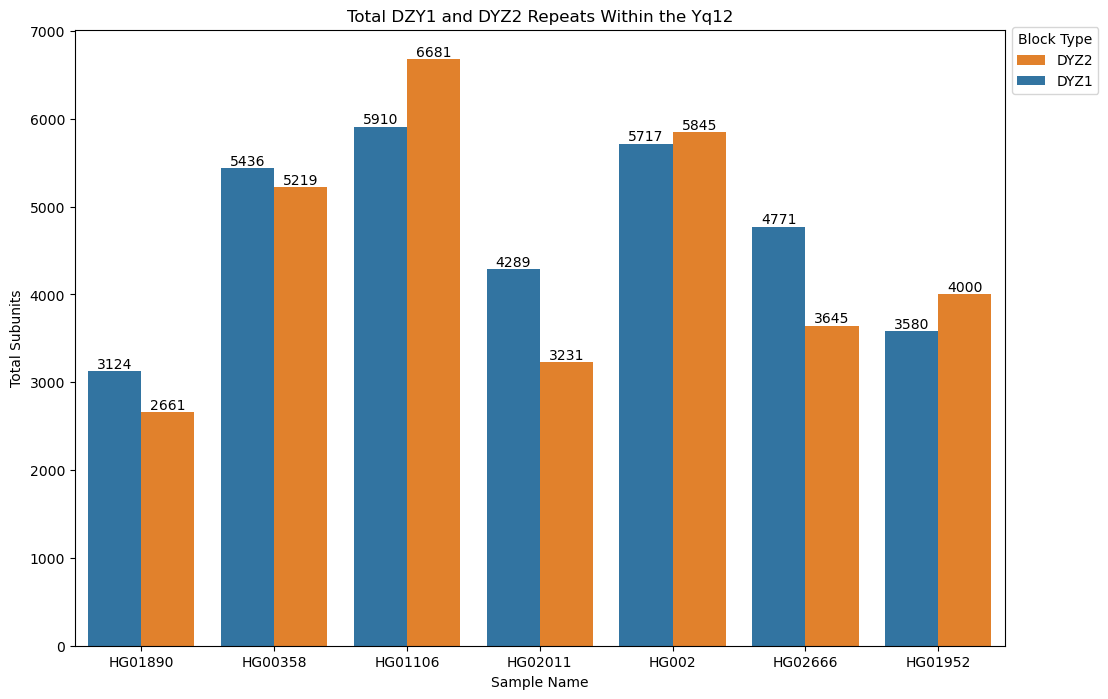

In [76]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 12,8
sampleList = ['HG01890', 'HG00358','HG01106','HG02011','HG002','HG02666','HG01952']
ax = sns.barplot(x="Sample Name", y="Total Repeats", hue="Repeat", data=tempDF.set_index("Sample Name").loc[sampleList].reset_index())
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title='Block Type', loc='center left', bbox_to_anchor=(1, 0.95)) 
plt.ylabel("Total Subunits")
plt.title("Total DZY1 and DYZ2 Repeats Within the Yq12")
for container in ax.containers:
    ax.bar_label(container)
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/Yq12_totalUnits.jpg", dpi=300, bbox_inches='tight')
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/Yq12_totalUnits.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [18]:
tempDF

,Sample Name,Total Repeats,Repeat
0,HG01890,3124,DYZ1
1,HG02666,4771,DYZ1
2,HG01106,5910,DYZ1
3,HG002,5717,DYZ1
4,HG02011,4289,DYZ1
5,HG00358,5436,DYZ1
6,HG01952,3580,DYZ1
7,HG01890,2661,DYZ2
8,HG02666,3645,DYZ2
9,HG01106,6681,DYZ2


In [3]:
tempDF

,Sample Name,Total Repeats,Repeat
0,HG01890,3124,DYZ1
1,HG02666,4771,DYZ1
2,HG01106,5910,DYZ1
3,HG002,5717,DYZ1
4,HG02011,4289,DYZ1
5,HG00358,5436,DYZ1
6,HG01952,3580,DYZ1
7,HG01890,2661,DYZ2
8,HG02666,3645,DYZ2
9,HG01106,6681,DYZ2


In [26]:
tempDF[(tempDF['Sample Name']=='HG01106')]

,Sample Name,Total Repeats,Repeat
2,HG01106,5910,DYZ1
9,HG01106,6681,DYZ2


In [28]:
12591/2

6295.5

In [1]:
print(5910/6681)
print(4771/3645)
print(4289/3231)
print(5436/5219)
print(3580/4000)
print(3124/2661)
print(5717/5845)

0.8845981140547822
1.3089163237311385
1.3274528009904054
1.0415788465223224
0.895
1.1739947388199925
0.9781009409751925


In [7]:
import numpy as np

In [12]:
np.mean([0.895,0.8845981140547822,1.3089163237311385,1.3274528009904054,1.0415788465223224,1.1739947388199925,0.9781009409751925])

1.0870916807276905

In [3]:
for sample in set(tempDF['Sample Name']):
    print(sample)
    print(sum(tempDF[tempDF['Sample Name']==sample]['Total Repeats'])/2)
    print('\n')

HG01106
6295.5


HG02011
3760.0


HG01890
2892.5


HG002
5468.0


HG01952
3790.0


HG02666
4208.0


HG00358
5327.5




In [39]:
sum(tempDF['Total Repeats'])

63483

In [40]:
sum(dyz2)

30656

In [3]:
dyz1 = list(tempDF[tempDF['Repeat']=='DYZ1']['Total Repeats'])

In [4]:
dyz2 = list(tempDF[tempDF['Repeat']=='DYZ2']['Total Repeats'])

In [33]:
from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(dyz1, dyz2, method='exact', alternative='two-sided')

In [34]:
print(U1)

29.0


In [35]:
print(p)

0.6200466200466201


In [5]:
dyz1

[3124, 4771, 5910, 5717, 4289, 5436, 3580]

In [6]:
from scipy import stats

In [10]:
shapiro_test_dyz1 = stats.shapiro(dyz1)

In [21]:
dyz1

[3124, 4771, 5910, 5717, 4289, 5436, 3580]

(array([1., 1., 0., 0., 1., 1., 0., 0., 1., 2.]),
 array([3124. , 3402.6, 3681.2, 3959.8, 4238.4, 4517. , 4795.6, 5074.2,
        5352.8, 5631.4, 5910. ]),
 <BarContainer object of 10 artists>)

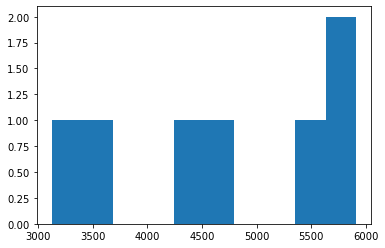

In [19]:
plt.hist(dyz1)

In [11]:
shapiro_test_dyz1

ShapiroResult(statistic=0.9320454001426697, pvalue=0.5684270262718201)

In [12]:
shapiro_test_dyz2 = stats.shapiro(dyz2)

In [20]:
dyz2

[2661, 3645, 6681, 5845, 3231, 5219, 4000]

(array([1., 1., 1., 1., 0., 0., 1., 1., 0., 1.]),
 array([2661., 3063., 3465., 3867., 4269., 4671., 5073., 5475., 5877.,
        6279., 6681.]),
 <BarContainer object of 10 artists>)

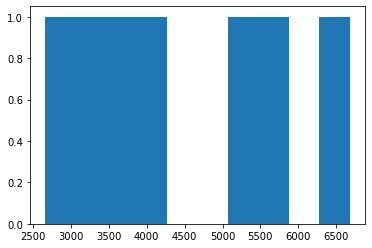

In [18]:
plt.hist(dyz2)

In [13]:
shapiro_test_dyz2

ShapiroResult(statistic=0.9490340352058411, pvalue=0.7208975553512573)

In [22]:
import statsmodels.api as sm
import pylab as py

In [32]:
dyz1_q = [np.quantile(dyz1, .25), np.quantile(dyz1, .50), np.quantile(dyz1, .75)]
dyz2_q = [np.quantile(dyz2, .25), np.quantile(dyz2, .50), np.quantile(dyz2, .75)]

In [33]:
import statsmodels.api as sm
import pylab as py

<AxesSubplot:>

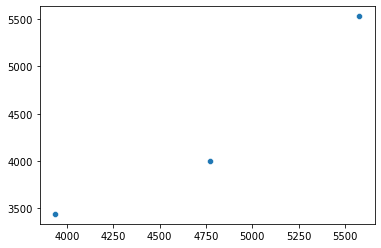

In [38]:
sns.scatterplot(x=dyz1_q, y=dyz2_q)

In [41]:
dyz2_q

[3438.0, 4000.0, 5532.0]

In [39]:
dyz1_q

[3934.5, 4771.0, 5576.5]